### An Investment Portfolio

Assume you want to invest in stocks using the following strategy.

You will buy a large number (say 100) different stocks, and will sell them individually when one of two possible outcomes happen:

- The share value *increases by 2%*

- The share value *decreases by 1%*

Let's say we can assume that:

1- All stocks are perfectly independent

2- At each moment in time (say every 1 second), each share is equally likely to go up by 0.1% or go down by 0.1%

#### What is your expected profit by the time all shares are sold?

In [3]:
%matplotlib notebook
import matplotlib.pyplot as pl
import numpy as np

In [37]:
def walker(start, lower_stop, higher_stop, increment = 0.1):
    out=[start]
    while not np.isclose(out[-1],lower_stop)+np.isclose(out[-1],higher_stop):
        random = np.random.random()
        if random>0.5:
            step=increment
        else:
            step=-increment
        out.append(out[-1]+step)
    return out

<IPython.core.display.Javascript object>


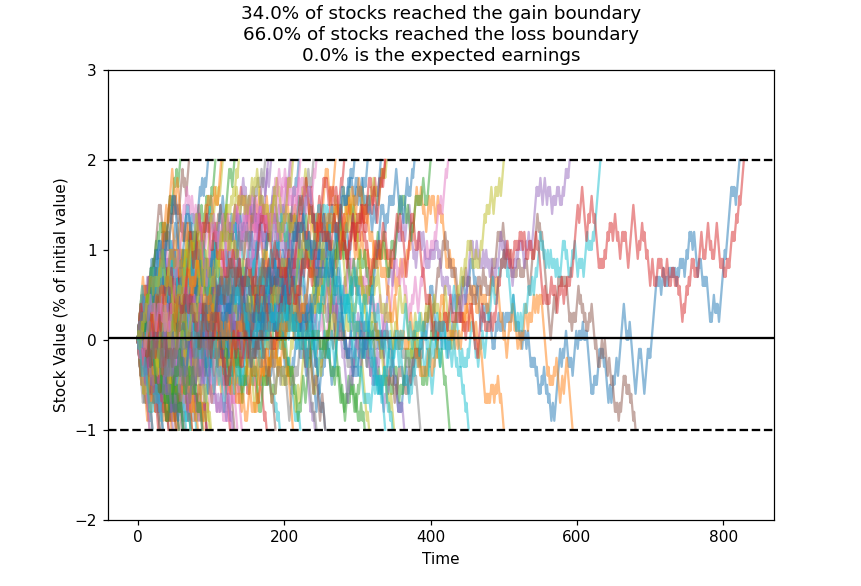

In [52]:
upper = 2.0
lower = -1.0
Nstocks = 100

ending_location=np.array([])
pl.figure()
for i in range(Nstocks): 
    walk = walker(0,lower,upper)
    pl.plot(walk,ls='-',lw=1.5,alpha=0.5)
    ending_location=np.append(ending_location, walk[-1])

Nup = np.sum(np.isclose(ending_location,upper))
percent_up = Nup/len(ending_location)
percent_down = 1-percent_up

pl.axhline(y=lower,ls='--',color='k')
pl.axhline(y=upper,ls='--',color='k')
pl.axhline(y=np.mean(ending_location),color='k',ls='-')
pl.ylabel('Stock Value (% of initial value)')
pl.xlabel('Time')
pl.title('%1.1f%% of stocks reached the gain boundary\n%1.1f%% of stocks reached the loss boundary\n%1.1f%% is the expected earnings'%(100*percent_up,100*percent_down,np.mean(ending_location)))
pl.ylim(lower-1, upper+1)
pl.show()